<a href="https://colab.research.google.com/github/svgoudar/My-Data-Science-Roadmap/blob/main/EDA/1.Handling%20Missing%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Handling Missing Data**

There are **three main types of missing data**, and knowing the type is **essential** to choose the right imputation or handling strategy.

---

## 🔹 1. **MCAR – Missing Completely At Random**

> The missingness has **nothing to do** with the data (neither observed nor unobserved).

### ✅ Characteristics:

* No pattern to the missing data.
* Example: A user skips a question on a survey by accident.
* If you drop or impute values, **you won’t introduce bias**.

### 🔍 Example (Google Play Store):

* An app's `Rating` is missing because the developer hasn't enabled ratings yet, unrelated to other variables.

---

## 🔹 2. **MAR – Missing At Random**

> The missingness is **related to other observed variables**, but **not to the missing values themselves**.

### ✅ Characteristics:

* There **is a pattern**, and we can **predict** missingness using other features.
* More common in real-world datasets.
* Imputation using **other variables** (KNN, group-wise median, etc.) is reasonable.

### 🔍 Example:

* `Size` is missing more often for apps in the **"Games"** category, but not related to the actual size value.

---

## 🔹 3. **MNAR – Missing Not At Random**

> The missingness is **related to the missing value itself**, even after considering other features.

### ❌ Problematic:

* Biased and hard to detect.
* Imputation can introduce bias unless handled carefully.
* You may need **domain expertise**, or create a **"missing" indicator**.

### 🔍 Example:

* Users **don’t rate poorly performing apps**, so `Rating` is missing when the value would likely be **low**.
* Meaning: The missing `Rating` itself depends on the value it would have taken.

---

## ✅ Summary Table:

| Type | Depends on other variables? | Depends on own value? | Handling Approach                                |
| ---- | --------------------------- | --------------------- | ------------------------------------------------ |
| MCAR | ❌ No                        | ❌ No                  | Drop rows/columns, Mean/Median/Mode safe         |
| MAR  | ✅ Yes                       | ❌ No                  | KNN, Group-wise imputation, Iterative imputer    |
| MNAR | ✅ Maybe                     | ✅ Yes                 | Add flag, advanced modeling, expert intervention |

---

Would you like a quick diagnostic method in Python to **test for MCAR or MAR**?


## **Techniques in Handling Missing Data**
---

### ✅ 1. **Drop Rows (Listwise Deletion)**

#### ✅ Use When:

* Missing values are **very few (<5%)**
* Data is **missing completely at random (MCAR)**
* The row is not critical for analysis

#### ❌ Avoid When:

* You're losing too many rows (risk of bias)

---

### ✅ 2. **Drop Columns**

#### ✅ Use When:

* A column has **>40-50% missing values**
* That feature is **not essential** for your problem
* There's **no logical way** to impute it

---

### ✅ 3. **Mean / Median / Mode Imputation**

#### ✅ Use When:

* Data is **missing at random (MAR)**
* Numeric features:

  * **Mean**: for **symmetric data**
  * **Median**: for **skewed data** or outliers
* Categorical features: use **mode**
* Proportion of missing data is **low (<10–15%)**

---

### ✅ 4. **Group-wise Imputation**

#### ✅ Use When:

* There are **subgroups** (like categories or clusters)
* The feature’s values **vary by group**
* Example: Impute `Rating` using median within each `Category` in Playstore data

---

### ✅ 5. **Forward Fill / Backward Fill**

#### ✅ Use When:

* **Time series data**
* Data is missing in **sequences**
* Example: Missing prices or timestamps in a trend

---

### ✅ 6. **Constant/Flag Value Imputation**

#### ✅ Use When:

* You want to **explicitly encode missingness**
* Data is **not numerical**, or "missing" means **"unknown"**
* Good for categorical features like `Content Rating = Unknown`

---

### ✅ 7. **Interpolation**

#### ✅ Use When:

* Numeric features in **ordered** or **time-based** data
* Values are **expected to vary gradually**
* Works well for sensors, stock prices, ratings over time

---

### ✅ 8. **KNN Imputation**

#### ✅ Use When:

* You have **numerical features**
* Missingness is not random but related to other columns
* Dataset is **not too large** (KNN is slow on big data)
* There is a **pattern or similarity** between rows

---

### ✅ 9. **Iterative Imputer (Multivariate / MICE)**

#### ✅ Use When:

* Multiple columns have missing data
* Variables are **correlated**
* You need **more accurate imputations**
* Works well with **structured tabular data**

---

### ✅ 10. **Model-Based Imputation**

#### ✅ Use When:

* You're building a **predictive model** and can't lose data
* The missing feature is a **target variable** or very important
* Other features are good predictors of the missing column

---

### ✅ 11. **Missingness Indicator Feature**

#### ✅ Use When:

* Missing data might be **informative**
* You suspect **non-random missingness (MNAR)**
* Helps model understand **"presence vs absence"**

---

#### 📝 Example Scenarios with Google Play Store Data:

| Feature          | Missing? | Handling Technique                        | Why?                                           |
| ---------------- | -------- | ----------------------------------------- | ---------------------------------------------- |
| `Rating`         | Yes      | Median or KNN/Iterative                   | Skewed data with possible correlation          |
| `Size`           | Yes      | Group-wise impute by `Category` or Median | Apps in same category have similar size ranges |
| `Content Rating` | Yes      | Mode or Constant Value ("Unknown")        | Categorical and few missing                    |
| `Installs`       | No       | —                                         | —                                              |
| `Reviews`        | No       | —                                         | —                                              |

---

### ✅ Summary: Decision Guide

| Situation                                 | Recommended Technique                |
| ----------------------------------------- | ------------------------------------ |
| Few missing rows (<5%)                    | Drop rows                            |
| Column has >50% missing                   | Drop column                          |
| Numeric data with few missing             | Mean/Median                          |
| Categorical data with few missing         | Mode/Constant                        |
| Group-based behavior (e.g., by category)  | Group-wise Imputation                |
| Time-series or sequential data            | Forward/Backward Fill, Interpolation |
| Complex patterns across multiple features | KNN, Iterative Imputer               |
| Missingness may carry meaning             | Add missing flag                     |
| Predict value using other columns         | Model-based imputation               |

---

In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "googleplaystore.csv"
file_path_1 = "googleplaystore_user_reviews.csv"

# Load the latest version
df_apps = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "lava18/google-play-store-apps",
  file_path
)

df_reviews = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "lava18/google-play-store-apps",
  file_path_1
)

/tmp/ipython-input-1-3247290267.py:11: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_apps = kagglehub.load_dataset(


100%|██████████| 312k/312k [00:00<00:00, 66.1MB/s]

Extracting zip of googleplaystore.csv...



/tmp/ipython-input-1-3247290267.py:17: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_reviews = kagglehub.load_dataset(


In [2]:
df_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
df_apps.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9367.0,NaN,NaN,NaN,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_na = df_apps.isna().sum()

In [6]:
df_na[df_na > 0]

,0
Rating,1474
Type,1
Content Rating,1
Current Ver,8
Android Ver,3


In [7]:
df_apps.columns[df_apps.isna().sum() > 0]

Index(['Rating', 'Type', 'Content Rating', 'Current Ver', 'Android Ver'], dtype='object')

In [8]:
df_apps.select_dtypes("O")

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [9]:
df_apps['Size'].value_counts()

,count
Size,
Varies with device,1695
11M,198
12M,196
14M,194
13M,191
...,...
552k,1
885k,1
1020k,1


## **Handling Mssing Values**

In **Exploratory Data Analysis (EDA)**, handling missing data is crucial for building robust models and ensuring data quality. There are multiple **strategies to handle missing values**, depending on the context and data type.

---

## 🧭 **Types of Missing Data**

1. **MCAR** (Missing Completely At Random)
2. **MAR** (Missing At Random)
3. **MNAR** (Missing Not At Random)

---

## ✅ **Common Techniques to Handle Missing Data**

### 🔹 1. **Remove Missing Values**

* **Drop Rows**: `df.dropna()`
* **Drop Columns**: `df.dropna(axis=1)`

> ✅ Use when the missing portion is small or irrelevant.

---

### 🔹 2. **Imputation (Fill Missing Values)**

#### For **Numerical Columns**:

| Method        | Code                                    | When to Use                          |
| ------------- | --------------------------------------- | ------------------------------------ |
| Mean          | `df['col'].fillna(df['col'].mean())`    | Symmetric data                       |
| Median        | `df['col'].fillna(df['col'].median())`  | Skewed data                          |
| Mode          | `df['col'].fillna(df['col'].mode()[0])` | When repeated value is best          |
| Interpolation | `df['col'].interpolate()`               | Time-series or ordered data          |
| KNN Imputer   | from sklearn.impute                     | When you want model-based imputation |

#### For **Categorical Columns**:

| Method              | Code                                    | When to Use              |
| ------------------- | --------------------------------------- | ------------------------ |
| Mode                | `df['col'].fillna(df['col'].mode()[0])` | Most common category     |
| "Unknown"/"Missing" | `df['col'].fillna('Unknown')`           | To preserve missing info |



| Method           | When to Use                                    |
| ---------------- | ---------------------------------------------- |
| `dropna`         | When data is enough and missing values are few |
| `fillna(mean)`   | When data is symmetric, no big outliers        |
| `fillna(median)` | When data is skewed or has outliers            |
| `fillna(mode)`   | When data is categorical or has a common value |


In [10]:
columns_with_nan = df_apps.columns[df_apps.isna().sum() > 0]

In [11]:
# max_occur = df_apps[columns_with_nan].Type.value_counts().idxmax()
max_occur = df_apps[columns_with_nan].Type.mode()[0]

In [12]:
max_occur

'Free'

In [13]:
df_apps['Type'].replace('0',max_occur,inplace=True)

/tmp/ipython-input-13-349166492.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_apps['Type'].replace('0',max_occur,inplace=True)


In [14]:
df_apps['Type'].value_counts()

,count
Type,
Free,10040
Paid,800


In [15]:
columns_with_nan

Index(['Rating', 'Type', 'Content Rating', 'Current Ver', 'Android Ver'], dtype='object')

In [16]:
df_apps.size

140933

In [17]:
df_apps['Rating'].value_counts()

,count
Rating,
4.4,1109
4.3,1076
4.5,1038
4.2,952
4.6,823
4.1,708
4.0,568
4.7,499
3.9,386


In [18]:
df_apps['Rating'].isna().count()

np.int64(10841)

In [19]:
df_apps['Type'].value_counts().reset_index()

,Type,count
0,Free,10040
1,Paid,800


In [20]:
df_apps.shape

(10841, 13)

In [21]:
df_apps.Rating.value_counts().sum().tolist()

9367

In [22]:
df_apps['Rating'].shape

(10841,)

In [23]:
df_apps['Rating'].isna().sum()

np.int64(1474)

In [24]:
import pandas as pd

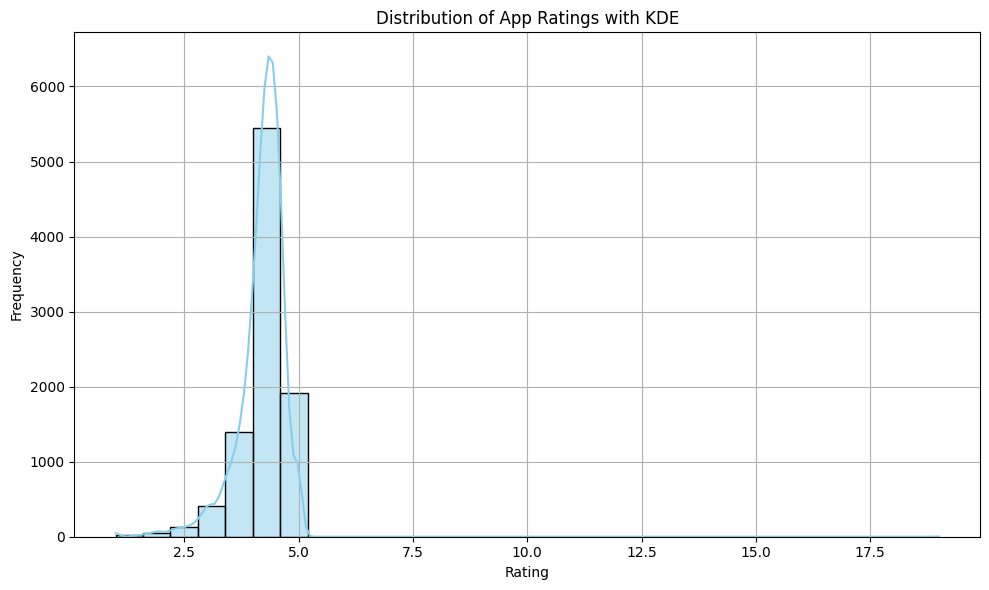

In [25]:
df_apps['Rating'] = pd.to_numeric(df_apps['Rating'], errors='coerce')
import matplotlib.pyplot as plt
import seaborn as sns
# Plot histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(df_apps['Rating'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of App Ratings with KDE')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
df_apps.shape[0] - df_apps['Rating'].value_counts().sum()

np.int64(1474)

In [27]:
!pip install seaborn

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
import plotly.express as px

# Remove outlier value (e.g., Rating = 19) before plotting
# df_filtered = df_apps[df_apps['Rating'] <= 5]

# Create an interactive KDE (density) plot using Plotly
fig = px.histogram(
    df_apps,
    x='Rating',
    marginal='violin',  # Adds a violin plot to the side
    nbins=40,
    opacity=0.7,
    histnorm='probability density',
    title='Distribution of App Ratings (Plotly KDE Approximation)'
)

fig.update_layout(
    xaxis_title='App Rating',
    yaxis_title='Density',
    bargap=0.1,
    template='plotly_white')
fig.show()


In [30]:
df_apps.drop(df_apps[df_apps['Rating'] > 5].index, inplace=True)

In [31]:
df_apps['Rating'] = df_apps['Rating'].astype(float)

In [32]:
df_apps.columns[df_apps.isna().sum() > 0]

Index(['Rating', 'Type', 'Current Ver', 'Android Ver'], dtype='object')

In [33]:
df_apps['Rating'].isna().sum()

np.int64(1474)

In [34]:
mean = df_apps['Rating'].mean()
df_apps['Rating'].fillna(mean,inplace=True)

/tmp/ipython-input-34-2604409895.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [35]:
df_apps.columns[df_apps.isna().sum() > 0]

Index(['Type', 'Current Ver', 'Android Ver'], dtype='object')

In [36]:
df_apps[df_apps['Type'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.191757,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [37]:
df_apps['Type'].fillna(df_apps['Type'].mode,inplace=True)

In [38]:
from pandas import  Series
df_apps = df_apps[df_apps['Type'].isin(['Paid', 'Free'])]


In [39]:
df_apps.columns[df_apps.isna().sum() > 0]

Index(['Current Ver', 'Android Ver'], dtype='object')

In [40]:
Q1 = df_apps['Rating'].quantile(0.25)
Q3 = df_apps['Rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_apps[(df_apps['Rating'] < lower_bound) | (df_apps['Rating'] > upper_bound)]
print("Outliers in Rating:\n", outliers[['App', 'Rating', 'Category']])

Outliers in Rating:
                                    App  Rating             Category
15     Learn To Draw Kawaii Characters     3.2       ART_AND_DESIGN
87       RST - Sale of cars on the PCT     3.2    AUTO_AND_VEHICLES
159                     Cloud of Books     3.3  BOOKS_AND_REFERENCE
176                   Free Book Reader     3.4  BOOKS_AND_REFERENCE
209                    Plugin:AOT v5.0     3.1             BUSINESS
...                                ...     ...                  ...
10757     Fisher-Price® Smart Connect™     2.7                TOOLS
10765  Chat For Strangers - Video Chat     3.4               SOCIAL
10766           FreedomPop Diagnostics     2.9                TOOLS
10819                        Fanfic-FR     3.3  BOOKS_AND_REFERENCE
10828          Manga-FR - Anime Vostfr     3.4               COMICS

[733 rows x 3 columns]


In [41]:
df_apps[df_apps['Size'].str.contains('Varies')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


In [42]:
df_apps['Category']

,Category
0,ART_AND_DESIGN
1,ART_AND_DESIGN
2,ART_AND_DESIGN
3,ART_AND_DESIGN
4,ART_AND_DESIGN
...,...
10836,FAMILY
10837,FAMILY
10838,MEDICAL
10839,BOOKS_AND_REFERENCE


In [43]:
df_apps.columns[df_apps.isna().sum() > 0]

Index(['Current Ver', 'Android Ver'], dtype='object')

In [44]:
category_column = df_apps.columns[df_apps.nunique() < 10].tolist()

In [45]:
df_apps[category_column] = df_apps[category_column].astype('category')

/tmp/ipython-input-45-3668454141.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
df_apps=df_apps.convert_dtypes()

In [47]:
df_apps.sample(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7190,CD Supply,BUSINESS,4.191757,0,14M,5+,Free,0,Mature 17+,Business,"May 28, 2018",2.3.2,5.0 and up


In [48]:
df_apps.dropna(subset=['Android Ver','Current Ver'],inplace=True)

In [49]:
df_apps.columns[df_apps.isna().sum() > 0]

Index([], dtype='object')

In [50]:
df_apps['Type'].value_counts()

,count
Type,
Free,10032
Paid,797


In [51]:
df_apps.columns[df_apps.isna().sum() > 0]

Index([], dtype='object')

In [52]:
df_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.191757,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [53]:
df_varies = df_apps[df_apps.apply(lambda x: x.str.contains('Varies with device').any(), axis=1)]

In [54]:
varies_index = df_varies.index.to_list()

In [55]:
df_apps =df_apps.drop(varies_index)

In [56]:
df_apps[df_apps.apply(lambda x: x.str.contains('Varies with device').any(), axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [57]:
df_apps[['Rating','Reviews','Price']] = df_apps[['Rating','Reviews','Price']].apply(pd.to_numeric,errors='coerce')

In [58]:
df_apps['Last Updated'] = pd.to_datetime(df_apps['Last Updated'])

In [59]:
df_apps.dtypes

,0
App,string[python]
Category,string[python]
Rating,Float64
Reviews,Int64
Size,string[python]
Installs,string[python]
Type,category
Price,Int64
Content Rating,category
Genres,string[python]


In [60]:
df_apps[['App','Category','Genres','Current Ver','Android Ver']].astype('string')

,App,Category,Genres,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Art & Design,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,Art & Design;Pretend Play,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Art & Design,1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Art & Design;Creativity,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,Art & Design,1.0,2.3 and up
...,...,...,...,...,...
10834,FR Calculator,FAMILY,Education,1.0.0,4.1 and up
10835,FR Forms,BUSINESS,Business,1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,Education,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,Education,1.0,4.1 and up


In [61]:
df_apps['Category'] = df_apps['Category'].astype('string')

In [62]:
df_apps.sample(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9922,Inbox.eu,COMMUNICATION,3.7,98,9.7M,"10,000+",Free,0,Everyone,Communication,2018-07-11,6.4.7,4.3 and up


In [63]:
df_apps['Installs'] = pd.to_numeric(df_apps['Installs'].str.replace(r'[,+]', '', regex=True))

In [64]:
df_apps.dtypes

,0
App,string[python]
Category,string[python]
Rating,Float64
Reviews,Int64
Size,string[python]
Installs,Int64
Type,category
Price,Int64
Content Rating,category
Genres,string[python]


In [65]:
df_apps['Size'].value_counts().sum()

np.int64(9049)

In [66]:
df_apps.shape

(9049, 13)

In [67]:
df_apps['Price'].isna().sum()

np.int64(715)

In [68]:
import seaborn as sbn

<Axes: xlabel='Price', ylabel='Count'>

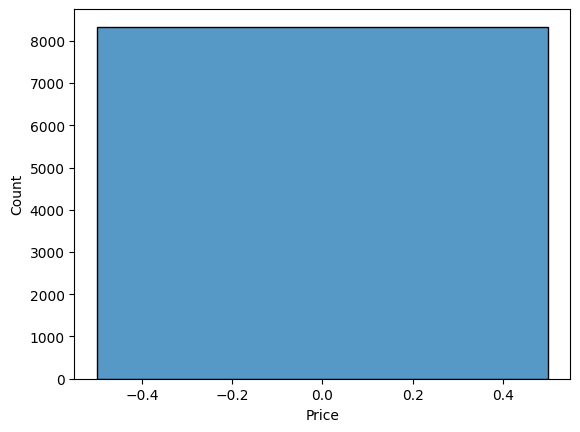

In [69]:
sbn.histplot(df_apps,x='Price')

In [70]:
df_apps['Price'].unique()

<IntegerArray>
[0, <NA>]
Length: 2, dtype: Int64

In [71]:
df_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10835,FR Forms,BUSINESS,4.191757,0,9.6M,10,Free,0,Everyone,Business,2016-09-29,1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,2018-07-06,1.0,4.1 and up


In [72]:
df_apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

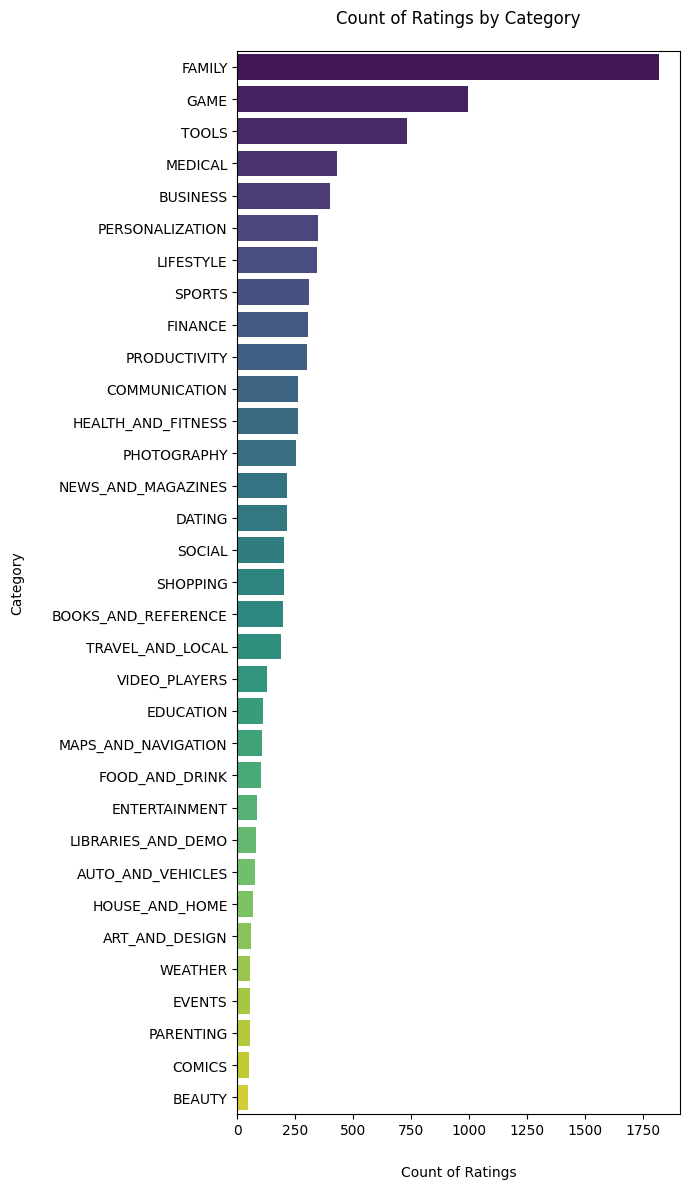

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# Prepare grouped data
rating_counts = df_apps.groupby('Category')['Rating'].count().sort_values(ascending=False)

# Set figure size to increase spacing between y-axis (Category) labels
plt.figure(figsize=(7, 12))  # Increase height (12) for more vertical spacing

# Create barplot
sns.barplot(
    x=rating_counts.values,
    y=rating_counts.index,
    palette="viridis"  # Optional: better color palette
)

# Add axis labels and title with padding
plt.xlabel('Count of Ratings', labelpad=20)
plt.ylabel('Category', labelpad=20)
plt.title('Count of Ratings by Category', pad=20)

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


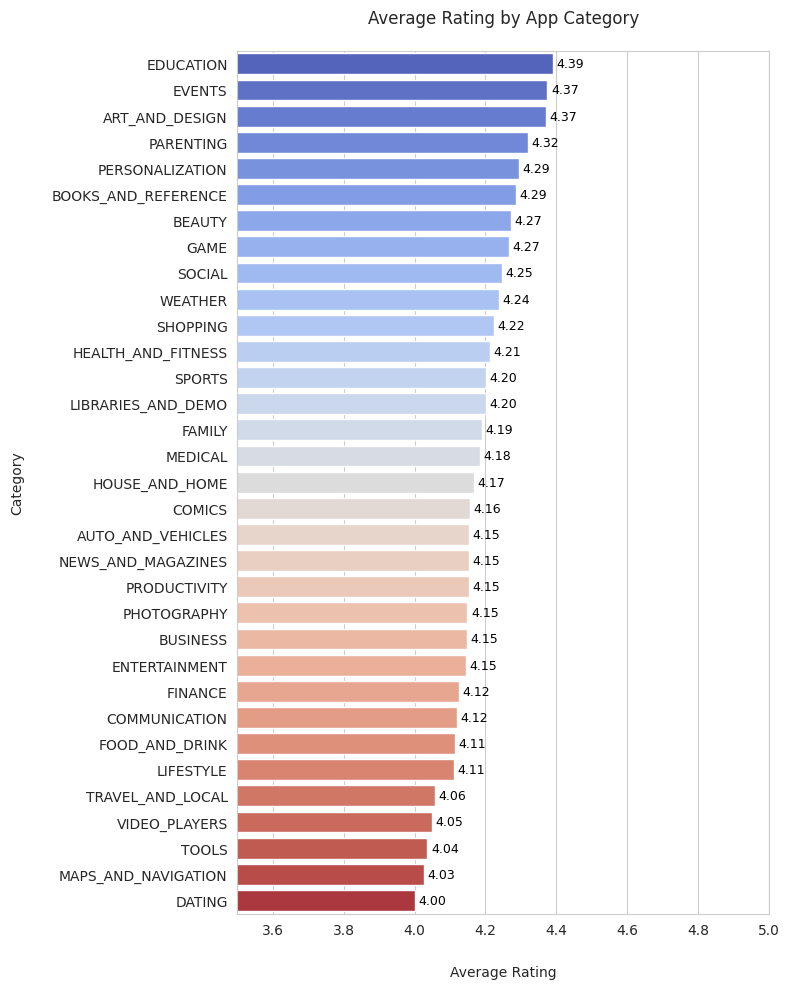

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Prepare grouped data: mean rating per category
rating_means = df_apps.groupby('Category')['Rating'].mean().sort_values(ascending=False)

# Set figure size and style
plt.figure(figsize=(8, 10))  # Taller figure for more spacing
sns.set_style("whitegrid")   # Light background grid for readability

# Create barplot
ax = sns.barplot(
    x=rating_means.values,
    y=rating_means.index,
    palette="coolwarm"  # Better color range for mean values
)

# Annotate each bar with its value
for i, value in enumerate(rating_means.values):
    ax.text(value + 0.01, i, f"{value:.2f}", va='center', fontsize=9, color='black')

# Axis labels and title
plt.xlabel('Average Rating', labelpad=20)
plt.ylabel('Category', labelpad=20)
plt.title('Average Rating by App Category', pad=20)

plt.xlim(3.5, 5.0)  # Focus on rating scale
plt.tight_layout()
plt.show()


In [76]:
import plotly.express as px

# Prepare data: Top 5 categories
top_categories = df_apps['Category'].value_counts().nlargest(10).reset_index()
top_categories.columns = ['Category', 'Count']

# Create interactive pie chart
fig = px.pie(
    top_categories,
    names='Category',
    values='Count',
    title='Top 5 App Categories',
    color_discrete_sequence=px.colors.sequential.Aggrnyl  # Optional color theme
)

fig.show()


In [77]:
df_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10835,FR Forms,BUSINESS,4.191757,0,9.6M,10,Free,0,Everyone,Business,2016-09-29,1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,2018-07-06,1.0,4.1 and up


In [78]:
import plotly.express as px

installs_by_category = df_apps.groupby('Category')['Installs'].sum().sort_values(ascending=False).reset_index()

fig = px.bar(
    installs_by_category.head(10),
    x='Installs',
    y='Category',
    orientation='h',
    title='Top 10 Categories by Total Installs',
    color='Installs',
    color_continuous_scale='viridis'
)
fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()

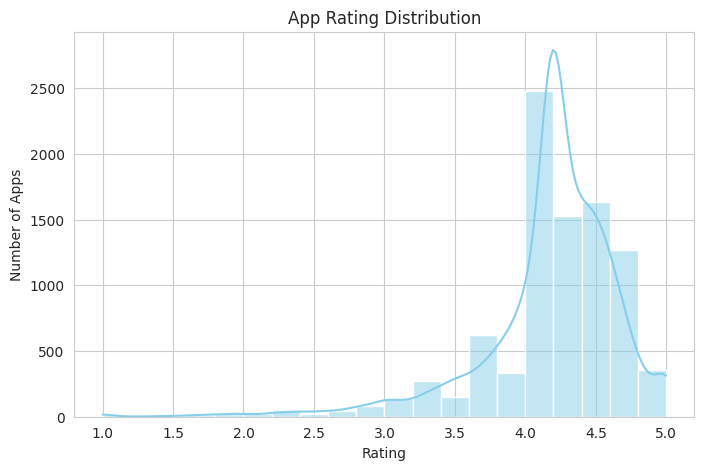

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df_apps['Rating'], bins=20, kde=True, color='skyblue')
plt.title('App Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.show()


In [80]:
fig = px.pie(
    df_apps,
    names='Type',
    title='Distribution of Free vs Paid Apps',
    hole=0.4,
    color_discrete_sequence=px.colors.qualitative.Set3
)
fig.show()


In [81]:
paid_apps = df_apps[df_apps['Type'] == 'Paid']
paid_apps['Price'] = paid_apps['Price'].astype(str).str.replace('$', '').astype(float)

plt.figure(figsize=(8, 4))
sns.boxplot(data=paid_apps, x='Price')
plt.title('Price Distribution of Paid Apps')
plt.xlim(0, 100)  # Cap outliers for readability
plt.show()


ValueError: could not convert string to float: '<NA>'

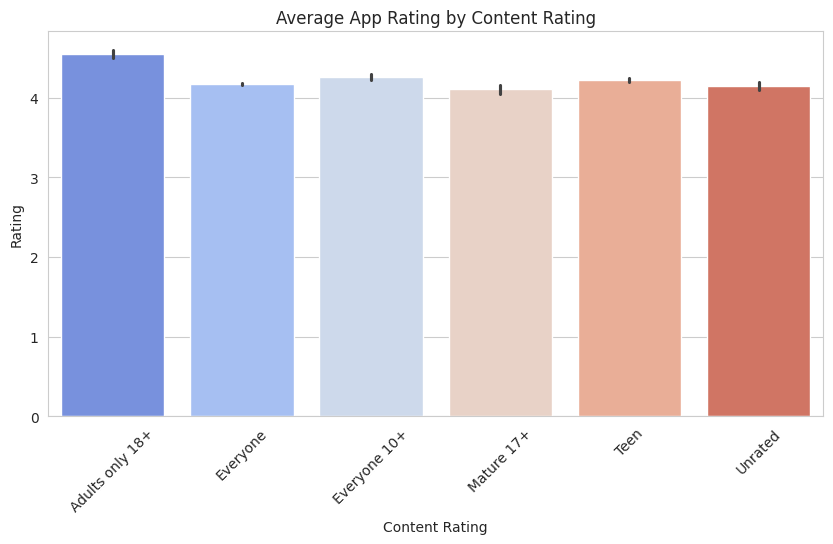

In [82]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_apps, x='Content Rating', y='Rating', palette='coolwarm')
plt.title('Average App Rating by Content Rating')
plt.xticks(rotation=45)
plt.show()


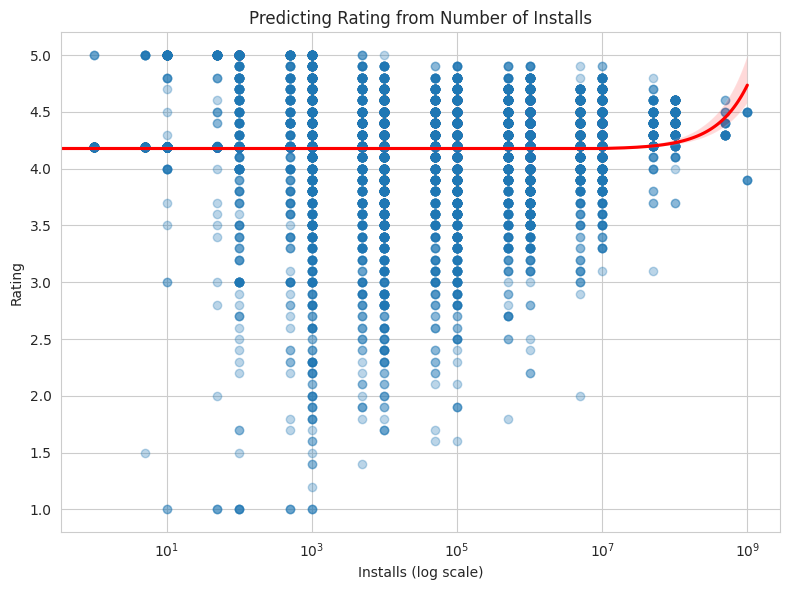

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert installs to numeric
df_apps['Installs_clean'] = df_apps['Installs'].replace('[+,]', '', regex=True).astype(float)

plt.figure(figsize=(8, 6))
sns.regplot(x='Installs_clean', y='Rating', data=df_apps, scatter_kws={'alpha':0.3}, line_kws={"color": "red"})
plt.xscale('log')  # Use log scale for installs
plt.xlabel('Installs (log scale)')
plt.ylabel('Rating')
plt.title('Predicting Rating from Number of Installs')
plt.tight_layout()
plt.show()


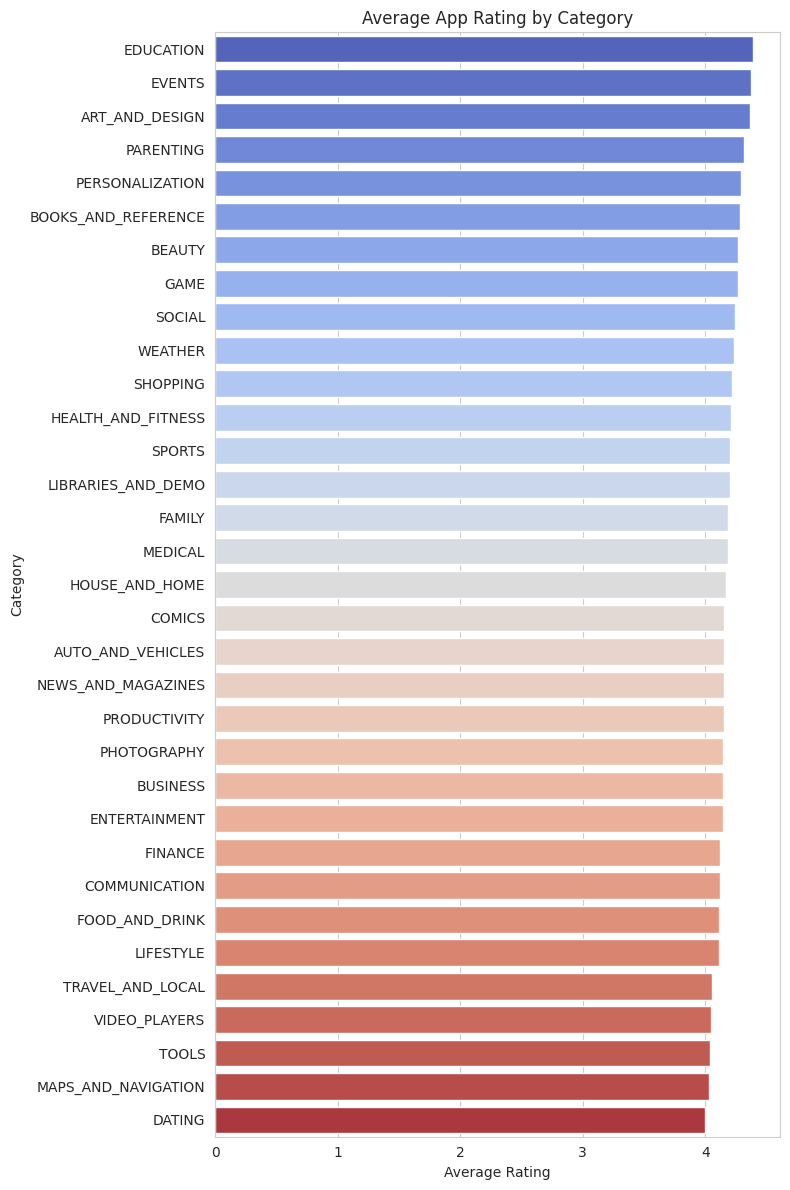

In [84]:
category_rating = df_apps.groupby('Category')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 12))
sns.barplot(x=category_rating.values, y=category_rating.index, palette='coolwarm')
plt.title("Average App Rating by Category")
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


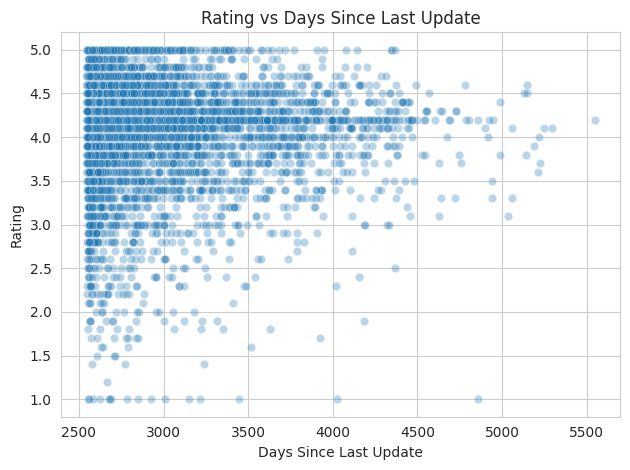

In [85]:
df_apps['Last Updated'] = pd.to_datetime(df_apps['Last Updated'], errors='coerce')
df_apps['Days Since Update'] = (pd.to_datetime('today') - df_apps['Last Updated']).dt.days

sns.scatterplot(data=df_apps, x='Days Since Update', y='Rating', alpha=0.3)
plt.title('Rating vs Days Since Last Update')
plt.xlabel('Days Since Last Update')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()


In [87]:
 df_apps.sort_values('Last Updated')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_clean,Days Since Update
7479,FML F*ck my life + widget,FAMILY,4.2,1415,209k,100000,Free,0,Everyone,Entertainment,2010-05-21,3.1,1.5 and up,100000.0,5547
7430,CJ Poker Odds Calculator,GAME,4.1,207,116k,50000,Free,0,Everyone,Card,2011-01-30,1.2,1.6 and up,50000.0,5293
10282,FD Shift Calendar Widget,TOOLS,4.1,981,73k,100000,Free,0,Everyone,Tools,2011-03-16,1.2.4,1.6 and up,100000.0,5248
8418,DEER HUNTER CHALLENGE,GAME,3.7,38767,4.1M,5000000,Free,0,Everyone 10+,Action,2011-04-11,1.4.3,2.0 and up,5000000.0,5222
8084,Freecell CY,GAME,4.0,387,1.1M,50000,Free,0,Everyone,Card,2011-04-16,1.3.3,1.6 and up,50000.0,5217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10373,FG VOC,BUSINESS,4.8,6,7.7M,1000,Free,0,Everyone,Business,2018-08-07,2.1.5,4.1 and up,1000.0,2547
10408,Shoot Hunter-Gun Killer,GAME,4.3,320334,27M,50000000,Free,0,Teen,Action,2018-08-08,1.1.2,4.1 and up,50000000.0,2546
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,1000,Paid,<NA>,Everyone,Health & Fitness,2018-08-08,1.9.3,4.2 and up,1000.0,2546
10209,Video Downloader For FB: Save FB Videos 2018,TOOLS,4.3,434,3.6M,50000,Free,0,Everyone,Tools,2018-08-08,1.1.9,4.0.3 and up,50000.0,2546


## **Interpolate**

### Interpolation is used in time series or sequential data when you want to estimate or fill in missing values based on existing data. It’s especially important when the temporal or sequential order matters.

In [88]:
import pandas as pd

# Sample time series with missing values
date_range = pd.date_range(start='2023-01-01', periods=10, freq='D')
data = [1, 2, None, 4, None, None, 7, 8, None, 10]
ts = pd.Series(data, index=date_range)


###  **1. Time-based Linear Interpolation**

---



Fills missing values linearly based on time spacing (works only if index is datetime).



In [89]:
ts.interpolate(method='time')


,0
2023-01-01,1.0
2023-01-02,2.0
2023-01-03,3.0
2023-01-04,4.0
2023-01-05,5.0
2023-01-06,6.0
2023-01-07,7.0
2023-01-08,8.0
2023-01-09,9.0
2023-01-10,10.0


### **2. Simple Linear Interpolation**

Interpolates linearly by position, not time.


In [90]:
ts.interpolate(method='linear')


,0
2023-01-01,1.0
2023-01-02,2.0
2023-01-03,3.0
2023-01-04,4.0
2023-01-05,5.0
2023-01-06,6.0
2023-01-07,7.0
2023-01-08,8.0
2023-01-09,9.0
2023-01-10,10.0


### **3. Forward Fill & Backward Fill (as fallback)**

In [92]:
ts.ffill()

,0
2023-01-01,1.0
2023-01-02,2.0
2023-01-03,2.0
2023-01-04,4.0
2023-01-05,4.0
2023-01-06,4.0
2023-01-07,7.0
2023-01-08,8.0
2023-01-09,8.0
2023-01-10,10.0


In [93]:
ts.bfill()

,0
2023-01-01,1.0
2023-01-02,2.0
2023-01-03,4.0
2023-01-04,4.0
2023-01-05,7.0
2023-01-06,7.0
2023-01-07,7.0
2023-01-08,8.0
2023-01-09,10.0
2023-01-10,10.0


### **4. Polynomial or Spline Interpolation**

In [94]:
ts.interpolate(method='polynomial', order=2)
# or
ts.interpolate(method='spline', order=3)


,0
2023-01-01,1.0
2023-01-02,2.0
2023-01-03,3.0
2023-01-04,4.0
2023-01-05,5.0
2023-01-06,6.0
2023-01-07,7.0
2023-01-08,8.0
2023-01-09,9.0
2023-01-10,10.0
